In [1]:
import numpy as np
import sys
import os
import copy
import matplotlib.pyplot as plt

from pypower import PowerSpectrumSmoothWindowMatrix

sys.path.append('../bin')
import sculpt_window
from sculpt_window import get_data

plt.style.use(os.path.join(os.path.abspath(''), 'plot_style.mplstyle'))
plots_dir = '../../plots/'

## Initial windows

In [2]:
rpcut = 2.5
ls = [0, 2]

In [3]:
# y1 v0.6 data
tracer = "LRG" 
region = "GCcomb"
kolim = (0., 0.4)
korebin = 5
ktrebin = 1
ktmax = 0.5
zrange = (0.4, 0.6)

datay1v04 = get_data('y1', tracer, region, rp_cut=rpcut, zrange=zrange, version='v0.6', kolim=kolim, korebin=korebin, ktmax=0.5, ktrebin=ktrebin)
wm = datay1v04['wmatrix']

data_dir = os.path.join("/global/cfs/cdirs/desi/users/mpinon/sculpt_window/", 'y1', 'v0.6')
window_fn = os.path.join(data_dir, 'wmatrix_smooth_{}_complete_gtlimaging_{}_{:.1f}_{:.1f}_default_lin{}_ells{}.npy'.format(tracer, region, zrange[0], zrange[1], '_rpcut{:.1f}_directedges'.format(rpcut) if rpcut else '', ''.join([str(i) for i in ls])))
wmnew =  PowerSpectrumSmoothWindowMatrix.load(window_fn)

# y1 v0.6 data, no rp-cut
datay1v04_norpcut = get_data('y1', tracer, region, rp_cut=0, zrange=zrange, version='v0.6', kolim=kolim, korebin=korebin, ktmax=0.5, ktrebin=ktrebin)
wm_norpcut = datay1v04_norpcut['wmatrix']

data_dir = os.path.join("/global/cfs/cdirs/desi/users/mpinon/sculpt_window/", 'y1', 'v0.6')
window_fn = os.path.join(data_dir, 'wmatrix_smooth_{}_complete_gtlimaging_{}_{:.1f}_{:.1f}_default_lin{}_ells{}.npy'.format(tracer, region, zrange[0], zrange[1], '', ''.join([str(i) for i in ls])))
wmnew_norpcut =  PowerSpectrumSmoothWindowMatrix.load(window_fn)


# y1 v0.6 test data, LRG GCcomb, cell size=6, with rpcut
tracer = "LRG" 
region = "GCcomb"
kolim = (0., 0.39)
korebin = 5
ktrebin = 1
ktmax=0.5
zrange = (0.4, 0.6)

datay1testLRG = get_data('y1', tracer, region, rp_cut=rpcut, zrange=zrange, version='test', kolim=kolim, korebin=korebin, ktmax=0.5, ktrebin=ktrebin, nran=5, cellsize=6, boxsize=7000)
wmtestLRG = datay1testLRG['wmatrix']

data_dir = os.path.join("/global/cfs/cdirs/desi/users/mpinon/sculpt_window/", 'y1', 'test')
resinfo = '_nran{:d}_cellsize{:d}_boxsize{:d}'.format(5, 6, 7000) 
window_fn = os.path.join(data_dir, 'wmatrix_smooth_{}_complete_gtlimaging_{}_{:.1f}_{:.1f}_default_lin{}{}_ells{}_analyticcov_jaxfloat64.npy'.format(tracer, region, zrange[0], zrange[1], resinfo, '_rpcut{:.1f}_directedges'.format(rpcut), ''.join([str(i) for i in ls])))
wmnewtestLRG =  PowerSpectrumSmoothWindowMatrix.load(window_fn)

# y1 v0.6 test data, LRG GCcomb, cell size=6, no rpcut
datay1testLRG_norpcut = get_data('y1', tracer, region, rp_cut=0, zrange=zrange, version='test', kolim=kolim, korebin=korebin, ktmax=0.5, ktrebin=ktrebin, nran=5, cellsize=6, boxsize=7000)
wmtestLRG_norpcut = datay1testLRG_norpcut['wmatrix']

data_dir = os.path.join("/global/cfs/cdirs/desi/users/mpinon/sculpt_window/", 'y1', 'test')
resinfo = '_nran{:d}_cellsize{:d}_boxsize{:d}'.format(5, 6, 7000) 
window_fn = os.path.join(data_dir, 'wmatrix_smooth_{}_complete_gtlimaging_{}_{:.1f}_{:.1f}_default_lin{}{}_ells{}.npy'.format(tracer, region, zrange[0], zrange[1], resinfo, '', ''.join([str(i) for i in ls])))
wmnewtestLRG_norpcut =  PowerSpectrumSmoothWindowMatrix.load(window_fn)

# y1 v0.6 test data, LRG GCcomb, cell size=8, rpcut
datay1testLRG_cellsize8 = get_data('y1', tracer, region, rp_cut=rpcut, zrange=zrange, version='test', kolim=kolim, korebin=korebin, ktmax=0.5, ktrebin=ktrebin, nran=5, cellsize=8, boxsize=8000)
wmtestLRG_cellsize8 = datay1testLRG_cellsize8['wmatrix']

data_dir = os.path.join("/global/cfs/cdirs/desi/users/mpinon/sculpt_window/", 'y1', 'test')
resinfo = '_nran{:d}_cellsize{:d}_boxsize{:d}'.format(5, 8, 8000) 
window_fn = os.path.join(data_dir, 'wmatrix_smooth_{}_complete_gtlimaging_{}_{:.1f}_{:.1f}_default_lin{}{}_ells{}.npy'.format(tracer, region, zrange[0], zrange[1], resinfo, '_rpcut{:.1f}_directedges'.format(rpcut), ''.join([str(i) for i in ls])))
wmnewtestLRG_cellsize8 =  PowerSpectrumSmoothWindowMatrix.load(window_fn)

# # y1 v0.6 test data, ELG SGC
# tracer = "ELG_LOPnotqso" 
# region = "SGC"
# kolim = (0., 0.4)
# korebin = 5
# ktrebin = 1
# rpcut = 2.5
# ktmax=0.5
# zrange = (0.8, 1.1)

# datay1v06ELG = get_data('y1', tracer, region, rp_cut=rpcut, zrange=zrange, kolim=kolim, korebin=korebin, ktmax=0.5, ktrebin=ktrebin)
# wmv06ELG = datay1v06ELG['wmatrix']

# # second gen mocks
# tracer = "ELG_LOP"
# region = "SGC"
# kolim = (0., 0.4)
# korebin = 5
# ktrebin = 1
# zrange = (0.8, 1.1)

# mockdata = get_data('secondGenMocksY1', tracer, region, rp_cut=rpcut, zrange=zrange, kolim=kolim, korebin=korebin, ktmax=0.5, ktrebin=ktrebin)
# mockwm = mockdata['wmatrix']

In [4]:
# print("Y1 v0.4:")
# print(wm.shape)
# print(np.min(wm.xin[0]), np.max(wm.xin[0]))
# print(np.min(wm.xout[0]), np.max(wm.xout[0]))
# #print(np.diff(wm.xout[0]))

# print("Y1 v0.6 LRG:")
# print(wmv06LRG.shape)
# print(np.min(wmv06LRG.xin[0]), np.max(wmv06LRG.xin[0]))
# print(np.min(wmv06LRG.xout[0]), np.max(wmv06LRG.xout[0]))
# #print(np.diff(wmv06.xout[0]))

# print("Y1 v0.6 ELG:")
# print(wmv06ELG.shape)
# print(np.min(wmv06ELG.xin[0]), np.max(wmv06ELG.xin[0]))
# print(np.min(wmv06ELG.xout[0]), np.max(wmv06ELG.xout[0]))
# #print(np.diff(wmv06.xout[0]))

# print("Y1 mocks:")
# print(mockwm.shape)
# print(np.min(mockwm.xin[0]), np.max(mockwm.xin[0]))
# print(np.min(mockwm.xout[0]), np.max(mockwm.xout[0]))
# #print(np.diff(mockwm.xout[0]))

In [5]:
ls = [0, 2]

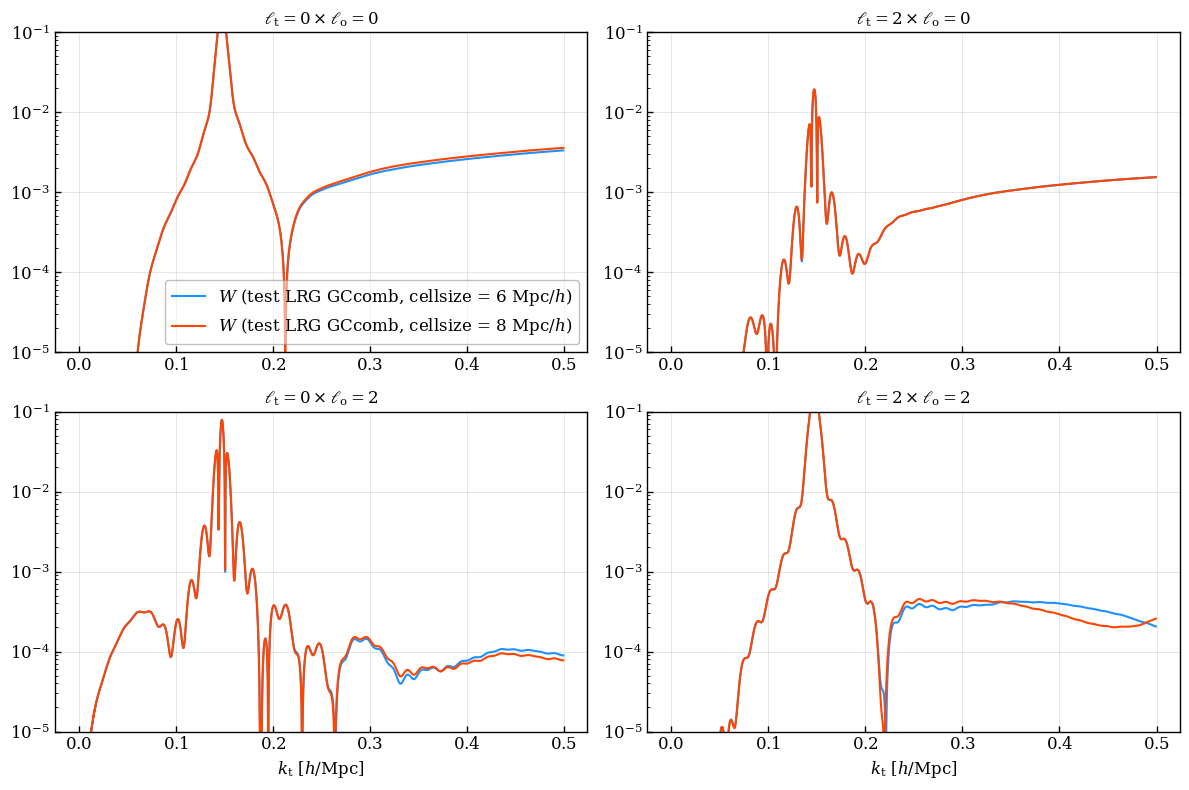

In [8]:
indexout = np.abs(wm.xout[0] - 0.15).argmin()

fig, lax = plt.subplots(len(ls), len(ls), figsize=(12, 8))
for iin, projin in enumerate(ls):
    for iout, projout in enumerate(ls):
        ax = lax[iout][iin]
        # Indices in approximative window matrix
        norm = 1.
        #ax.semilogy(wm.xin[iin], np.abs(wm.unpacked()[iin][iout][:, indexout]/norm/wm.xin[iin]), label=r'$W$ (v0.6 LRG GCcomb, cellsize = 7.8 $\mathrm{Mpc}/h$)')
        #ax.semilogy(wm_norpcut.xin[iin], np.abs(wm_norpcut.unpacked()[iin][iout][:, indexout]/norm/wm_norpcut.xin[iin]), label=r'$W$ (v0.6 LRG GCcomb, cellsize = 7.8 $\mathrm{Mpc}/h$, no $r_{\perp}$-cut)')
        ax.semilogy(wmtestLRG.xin[iin], np.abs(wmtestLRG.unpacked()[iin][iout][:, indexout]/norm/wmtestLRG.xin[iin]), label=r'$W$ (test LRG GCcomb, cellsize = 6 $\mathrm{Mpc}/h$)')
        #ax.semilogy(wmtestLRG_norpcut.xin[iin], np.abs(wmtestLRG_norpcut.unpacked()[iin][iout][:, indexout]/norm/wmtestLRG_norpcut.xin[iin]), label=r'$W$ (test LRG GCcomb, cellsize = 6 $\mathrm{Mpc}/h$, no $r_{\perp}$-cut)')
        ax.semilogy(wmtestLRG_cellsize8.xin[iin], np.abs(wmtestLRG_cellsize8.unpacked()[iin][iout][:, indexout]/norm/wmtestLRG_cellsize8.xin[iin]), label=r'$W$ (test LRG GCcomb, cellsize = 8 $\mathrm{Mpc}/h$)')
        ax.set_title(r'$\ell_{{\mathrm{{t}}}} = {:d} \times \ell_{{\mathrm{{o}}}} = {:d}$'.format(projin, projout))
        ax.set_ylim((1e-5, 0.1))
        #ax.set_xlim((0, 0.5))
        if iout == len(ls) - 1: ax.set_xlabel(r'$k_{\mathrm{t}}$ [$h/\mathrm{Mpc}$]')
        if iin == iout == 0: lax[iout][iin].legend()

plt.savefig(os.path.join(plots_dir, 'comparison_window_v0.4v0.6data_rpcut_cellsize_comp_{}_complete_{}{}_ells{}_semilogy.png'.format(tracer, region, '_rpcut{}'.format(rpcut) if rpcut else '', ''.join([str(i) for i in ls]))), dpi=300)
plt.show()

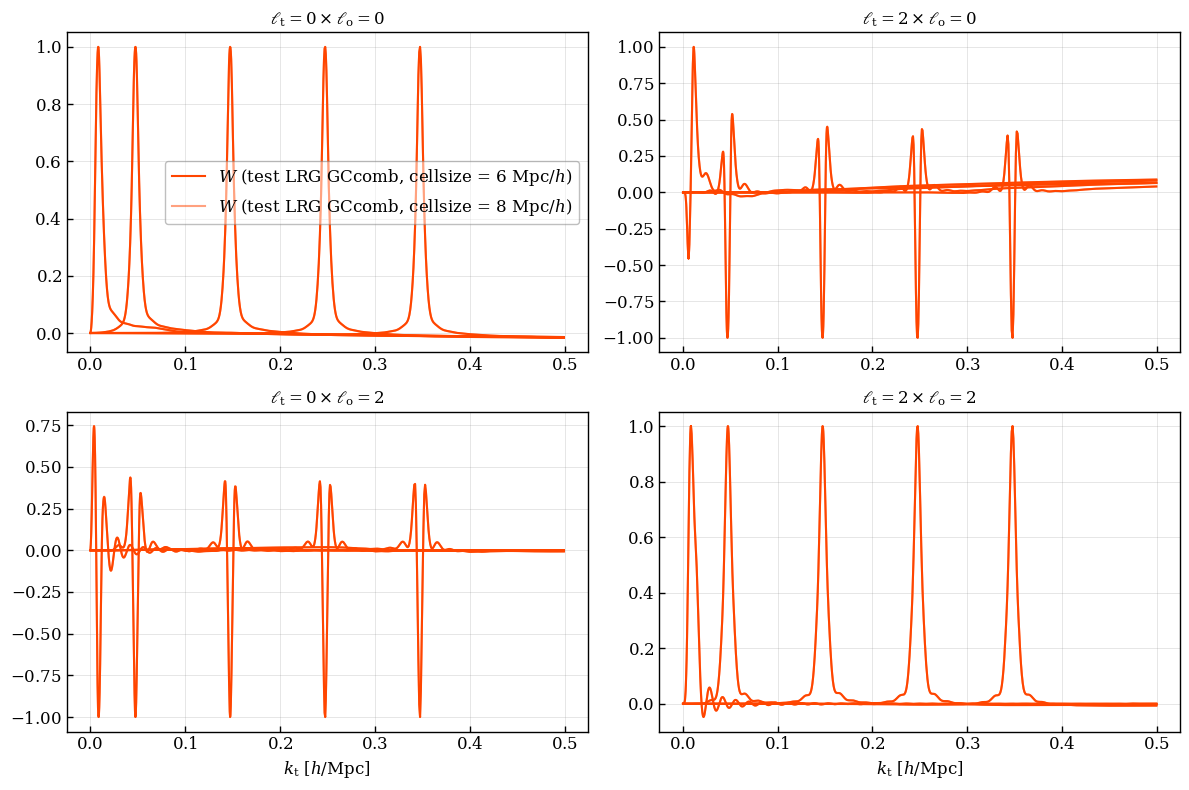

In [9]:
indicesout = [np.abs(wm.xout[0] - kobs).argmin() for kobs in [0.01, 0.05, 0.15, 0.25, 0.35]]

fig, lax = plt.subplots(len(ls), len(ls), figsize=(12, 8))

for indexout in indicesout:

    for iin, projin in enumerate(ls):
        for iout, projout in enumerate(ls):
            ax = lax[iout][iin]
            # Indices in approximative window matrix
            norm = np.max(np.abs(wm.unpacked()[iin][iout][:, indexout]/wm.xin[iin]))
            #ax.plot(wm.xin[iin], wm.unpacked()[iin][iout][:, indexout]/norm/wm.xin[iin], label=r'$W$ (v0.6 LRG GCcomb, cellsize = 7.8 $\mathrm{Mpc}/h$)' if indexout == 1 else '', color='C0')
            norm = np.max(np.abs(wm_norpcut.unpacked()[iin][iout][:, indexout]/wm_norpcut.xin[iin]))
            #ax.plot(wm_norpcut.xin[iin], wm_norpcut.unpacked()[iin][iout][:, indexout]/norm/wm_norpcut.xin[iin], label=r'$W$ (v0.6 LRG GCcomb, cellsize = 7.8 $\mathrm{Mpc}/h$, no $r_{\perp}$-cut)' if indexout == 1 else '', color='C0', ls='--')
            norm = np.max(np.abs(wmtestLRG.unpacked()[iin][iout][:, indexout]/wmtestLRG.xin[iin]))
            ax.plot(wmtestLRG.xin[iin], wmtestLRG.unpacked()[iin][iout][:, indexout]/norm/wmtestLRG.xin[iin], label=r'$W$ (test LRG GCcomb, cellsize = 6 $\mathrm{Mpc}/h$)' if indexout == 1 else '', color='C1')
            norm = np.max(np.abs(wmtestLRG_norpcut.unpacked()[iin][iout][:, indexout]/wmtestLRG_norpcut.xin[iin]))
            #ax.plot(wmtestLRG_norpcut.xin[iin], wmtestLRG_norpcut.unpacked()[iin][iout][:, indexout]/norm/wmtestLRG_norpcut.xin[iin], label=r'$W$ (test LRG GCcomb, cellsize = 6 $\mathrm{Mpc}/h$, no $r_{\perp}$-cut)' if indexout == 1 else '', color='C1', ls='--')
            norm = np.max(np.abs(wmtestLRG_cellsize8.unpacked()[iin][iout][:, indexout]/wmtestLRG_cellsize8.xin[iin]))
            ax.plot(wmtestLRG_cellsize8.xin[iin], wmtestLRG_cellsize8.unpacked()[iin][iout][:, indexout]/norm/wmtestLRG_cellsize8.xin[iin], label=r'$W$ (test LRG GCcomb, cellsize = 8 $\mathrm{Mpc}/h$)' if indexout == 1 else '', color='C1', alpha=0.5)
            ax.set_title(r'$\ell_{{\mathrm{{t}}}} = {:d} \times \ell_{{\mathrm{{o}}}} = {:d}$'.format(projin, projout))
            #ax.set_xlim((0.05, 0.25))
            if iout == len(ls) - 1: ax.set_xlabel(r'$k_{\mathrm{t}}$ [$h/\mathrm{Mpc}$]')
            if iin == iout == 0: lax[iout][iin].legend()

plt.savefig(os.path.join(plots_dir, 'comparison_window_v0.4v0.6data_rpcut_cellsize_comp_{}_complete_{}{}_ells{}.png'.format(tracer, region, '_rpcut{}'.format(rpcut) if rpcut else '', ''.join([str(i) for i in ls]))), dpi=300)
plt.show()

## Transformed windows

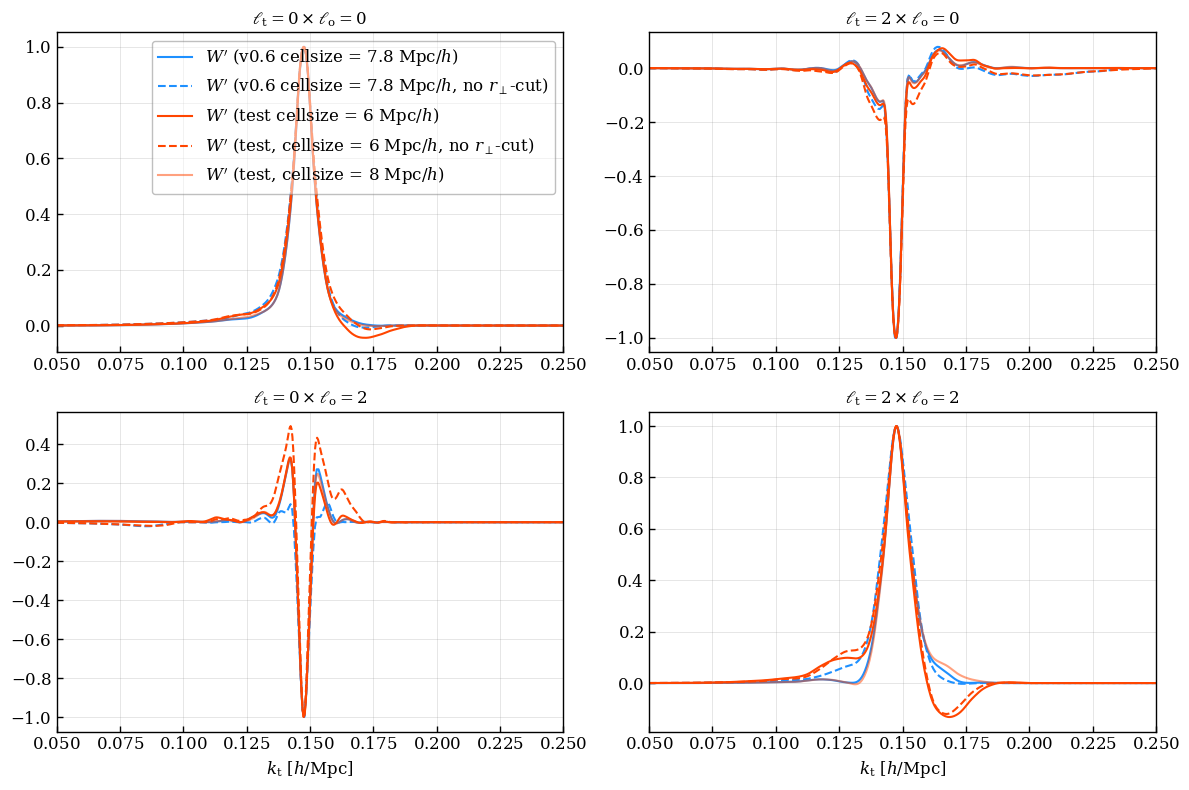

In [4]:
indexout = np.abs(wm.xout[0] - 0.15).argmin()

fig, lax = plt.subplots(len(ls), len(ls), figsize=(12, 8))
for iin, projin in enumerate(ls):
    for iout, projout in enumerate(ls):
        ax = lax[iout][iin]
        # Indices in approximative window matrix
        norm = np.max(np.abs(wmnew.unpacked()[iin][iout][:, indexout]/wmnew.xin[iin]))
        ax.plot(wmnew.xin[iin], wmnew.unpacked()[iin][iout][:, indexout]/norm/wmnew.xin[iin], label=r'$W^{\prime}$ (v0.6 cellsize = 7.8 $\mathrm{Mpc}/h$)', color='C0')
        norm = np.max(np.abs(wmnew_norpcut.unpacked()[iin][iout][:, indexout]/wmnew_norpcut.xin[iin]))
        ax.plot(wmnew_norpcut.xin[iin], wmnew_norpcut.unpacked()[iin][iout][:, indexout]/norm/wmnew_norpcut.xin[iin], label=r'$W^{\prime}$ (v0.6 cellsize = 7.8 $\mathrm{Mpc}/h$, no $r_{\perp}$-cut)', color='C0', ls='--')
        norm = np.max(np.abs(wmnewtestLRG.unpacked()[iin][iout][:, indexout]/wmnewtestLRG.xin[iin]))
        ax.plot(wmnewtestLRG.xin[iin], wmnewtestLRG.unpacked()[iin][iout][:, indexout]/norm/wmnewtestLRG.xin[iin], label=r'$W^{\prime}$ (test cellsize = 6 $\mathrm{Mpc}/h$)', color='C1')
        norm = np.max(np.abs(wmnewtestLRG_norpcut.unpacked()[iin][iout][:, indexout]/wmnewtestLRG_norpcut.xin[iin]))
        ax.plot(wmnewtestLRG_norpcut.xin[iin], wmnewtestLRG_norpcut.unpacked()[iin][iout][:, indexout]/norm/wmnewtestLRG_norpcut.xin[iin], label=r'$W^{\prime}$ (test, cellsize = 6 $\mathrm{Mpc}/h$, no $r_{\perp}$-cut)', color='C1', ls='--')
        norm = np.max(np.abs(wmnewtestLRG_cellsize8.unpacked()[iin][iout][:, indexout]/wmnewtestLRG_cellsize8.xin[iin]))
        ax.plot(wmnewtestLRG_cellsize8.xin[iin], wmnewtestLRG_cellsize8.unpacked()[iin][iout][:, indexout]/norm/wmnewtestLRG_cellsize8.xin[iin], label=r'$W^{\prime}$ (test, cellsize = 8 $\mathrm{Mpc}/h$)', color='C1', alpha=0.5)
        ax.set_title(r'$\ell_{{\mathrm{{t}}}} = {:d} \times \ell_{{\mathrm{{o}}}} = {:d}$'.format(projin, projout))
        ax.set_xlim((0.05, 0.25))
        if iout == len(ls) - 1: ax.set_xlabel(r'$k_{\mathrm{t}}$ [$h/\mathrm{Mpc}$]')
        if iin == iout == 0: lax[iout][iin].legend()

plt.savefig(os.path.join(plots_dir, 'comparison_transformedWindows_v0.4v0.6data_rpcut_cellsize_comp_{}_complete_{}{}_ells{}.png'.format(tracer, region, '_rpcut{}'.format(rpcut) if rpcut else '', ''.join([str(i) for i in ls]))), dpi=300)
plt.show()

## raw cutsky mocks

In [10]:
from power_spectrum import naming

output_dir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/'
data_type = "rawY1secondgenmocks"
wm_fn = os.path.join(output_dir, 'windows', naming(filetype='wm', data_type=data_type, imock=0, tracer=tracer, completeness='complete_', region=region, cellsize=6, boxsize=None, rpcut=0, direct_edges=False))
wm_cellsize6 = PowerSpectrumSmoothWindowMatrix.load(window_fn.format(''))

wm_fn = os.path.join(output_dir, 'windows', naming(filetype='wm', data_type=data_type, imock=0, tracer=tracer, completeness='complete_', region=region, cellsize=8, boxsize=None, rpcut=0, direct_edges=False))
wm_cellsize8 = PowerSpectrumSmoothWindowMatrix.load(window_fn.format(''))

In [11]:
tracer = "ELG_LOP" 
region = "SGC"
kolim = (0., 0.4)
korebin = 1
ktrebin = 1
ktmax = 0.5
zrange = (0.8, 1.1)

data = get_data('rawY1secondgenmocks', tracer, region, rp_cut=0, zrange=zrange, kolim=kolim, korebin=korebin, ktmax=0.5, ktrebin=ktrebin, nran=5, cellsize=6, boxsize=9000, covtype='analytic')
wm_cellsize6 = data['wmatrix']

data = get_data('rawY1secondgenmocks', tracer, region, rp_cut=0, zrange=zrange, kolim=kolim, korebin=korebin, ktmax=0.5, ktrebin=ktrebin, nran=5, cellsize=8, boxsize=8000, covtype='analytic')
wm_cellsize8 = data['wmatrix']

data_dir = os.path.join("/global/cfs/cdirs/desi/users/mpinon/sculpt_window/", 'rawY1secondgenmocks')
resinfo = '_nran{:d}_cellsize{:d}_boxsize{:d}'.format(5, 6, 9000)
window_fn = os.path.join(data_dir, 'wmatrix_smooth_{}_complete_gtlimaging_{}_{:.1f}_{:.1f}_default_lin{}{}_ells{}.npy'.format(tracer, region, zrange[0], zrange[1], resinfo, '', ''.join([str(i) for i in ls])))
wmnew_cellsize6 = PowerSpectrumSmoothWindowMatrix.load(window_fn)

resinfo = '_nran{:d}_cellsize{:d}_boxsize{:d}'.format(5, 8, 8000)
window_fn = os.path.join(data_dir, 'wmatrix_smooth_{}_complete_gtlimaging_{}_{:.1f}_{:.1f}_default_lin{}{}_ells{}.npy'.format(tracer, region, zrange[0], zrange[1], resinfo, '', ''.join([str(i) for i in ls])))
wmnew_cellsize8 = PowerSpectrumSmoothWindowMatrix.load(window_fn)

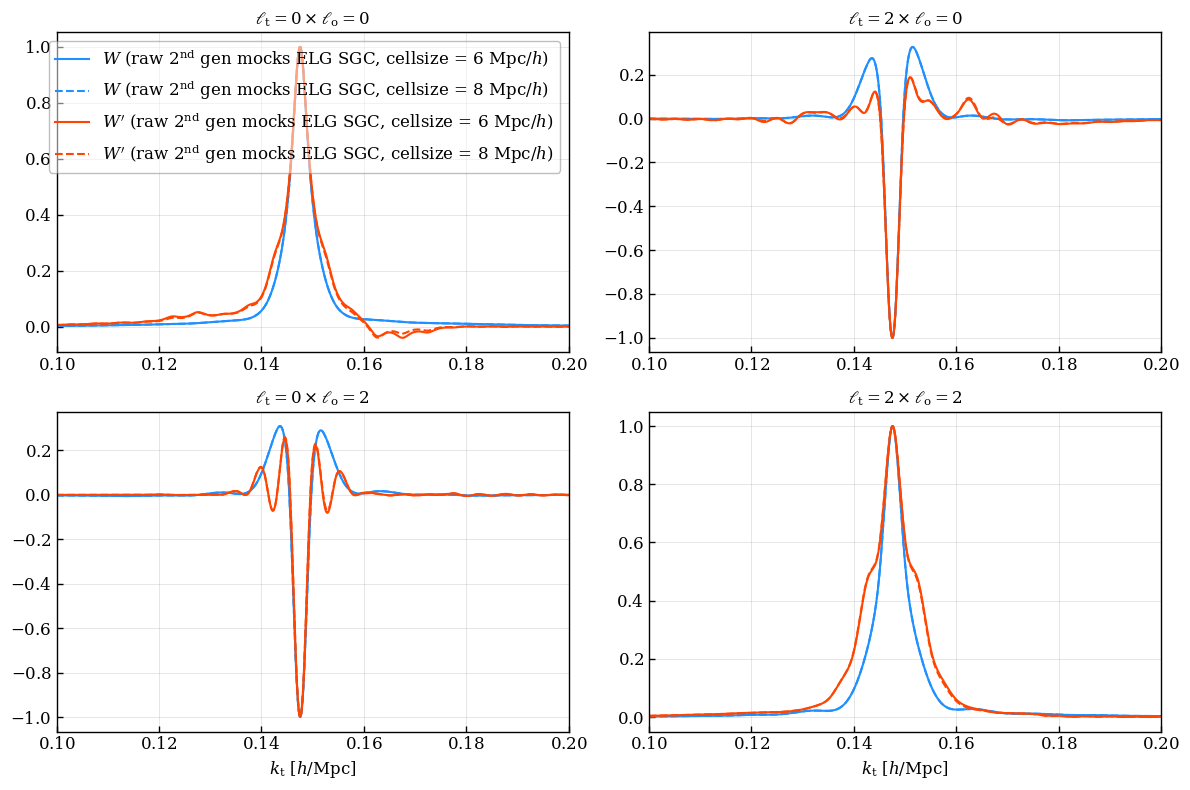

In [12]:
indexout = np.abs(wm.xout[0] - 0.15).argmin()

fig, lax = plt.subplots(len(ls), len(ls), figsize=(12, 8))
for iin, projin in enumerate(ls):
    for iout, projout in enumerate(ls):
        ax = lax[iout][iin]
        # Indices in approximative window matrix
        norm = np.max(np.abs(wm_cellsize6.unpacked()[iin][iout][:, indexout]/wm_cellsize6.xin[iin]))
        ax.plot(wm_cellsize6.xin[iin], wm_cellsize6.unpacked()[iin][iout][:, indexout]/norm/wm_cellsize6.xin[iin], label=r'$W$ (raw $2^{\mathrm{nd}}$ gen mocks ELG SGC, cellsize = 6 $\mathrm{Mpc}/h$)', color='C0')
        norm = np.max(np.abs(wm_cellsize8.unpacked()[iin][iout][:, indexout]/wm_cellsize8.xin[iin]))
        ax.plot(wm_cellsize8.xin[iin], wm_cellsize8.unpacked()[iin][iout][:, indexout]/norm/wm_cellsize8.xin[iin], label=r'$W$ (raw $2^{\mathrm{nd}}$ gen mocks ELG SGC, cellsize = 8 $\mathrm{Mpc}/h$)', color='C0', ls='--')
        norm = np.max(np.abs(wmnew_cellsize6.unpacked()[iin][iout][:, indexout]/wmnew_cellsize6.xin[iin]))
        ax.plot(wmnew_cellsize6.xin[iin], wmnew_cellsize6.unpacked()[iin][iout][:, indexout]/norm/wmnew_cellsize6.xin[iin], label=r'$W^{\prime}$ (raw $2^{\mathrm{nd}}$ gen mocks ELG SGC, cellsize = 6 $\mathrm{Mpc}/h$)', color='C1')
        norm = np.max(np.abs(wmnew_cellsize8.unpacked()[iin][iout][:, indexout]/wmnew_cellsize8.xin[iin]))
        ax.plot(wmnew_cellsize8.xin[iin], wmnew_cellsize8.unpacked()[iin][iout][:, indexout]/norm/wmnew_cellsize8.xin[iin], label=r'$W^{\prime}$ (raw $2^{\mathrm{nd}}$ gen mocks ELG SGC, cellsize = 8 $\mathrm{Mpc}/h$)', color='C1', ls='--')
        ax.set_title(r'$\ell_{{\mathrm{{t}}}} = {:d} \times \ell_{{\mathrm{{o}}}} = {:d}$'.format(projin, projout))
        ax.set_xlim((0.1, 0.2))
        if iout == len(ls) - 1: ax.set_xlabel(r'$k_{\mathrm{t}}$ [$h/\mathrm{Mpc}$]')
        if iin == iout == 0: lax[iout][iin].legend()

plt.savefig(os.path.join(plots_dir, 'comparison_transformedWindows_rawY1secondgenmocks_cellsizecomp_{}_complete_{}_ells{}.png'.format(tracer, region, ''.join([str(i) for i in ls]))), dpi=300)
plt.show()

## EZmocks covariance

In [16]:
tracer = "LRG" 
region = "NGC"
kolim = (0., 0.39)
korebin = 5
ktrebin = 1
ktmax = 0.5
zrange = (0.4, 0.6)
rpcut = 2.5

data = get_data('y1', tracer, region, rp_cut=rpcut, zrange=zrange, version='test', kolim=kolim, korebin=korebin, ktmax=0.5, ktrebin=ktrebin, nran=5, cellsize=8, boxsize=8000, covtype='analytic')
wm = data['wmatrix']

data_dir = os.path.join("/global/cfs/cdirs/desi/users/mpinon/sculpt_window/", 'y1/test')
resinfo = '_nran{:d}_cellsize{:d}_boxsize{:d}'.format(5, 8, 8000)
window_fn = os.path.join(data_dir, 'wmatrix_smooth_{}_complete_gtlimaging_{}_{:.1f}_{:.1f}_default_lin{}_rpcut2.5_directedges_ells{}_ezmockscov.npy'.format(tracer, region, zrange[0], zrange[1], resinfo, ''.join([str(i) for i in ls])))
wmnew = PowerSpectrumSmoothWindowMatrix.load(window_fn)

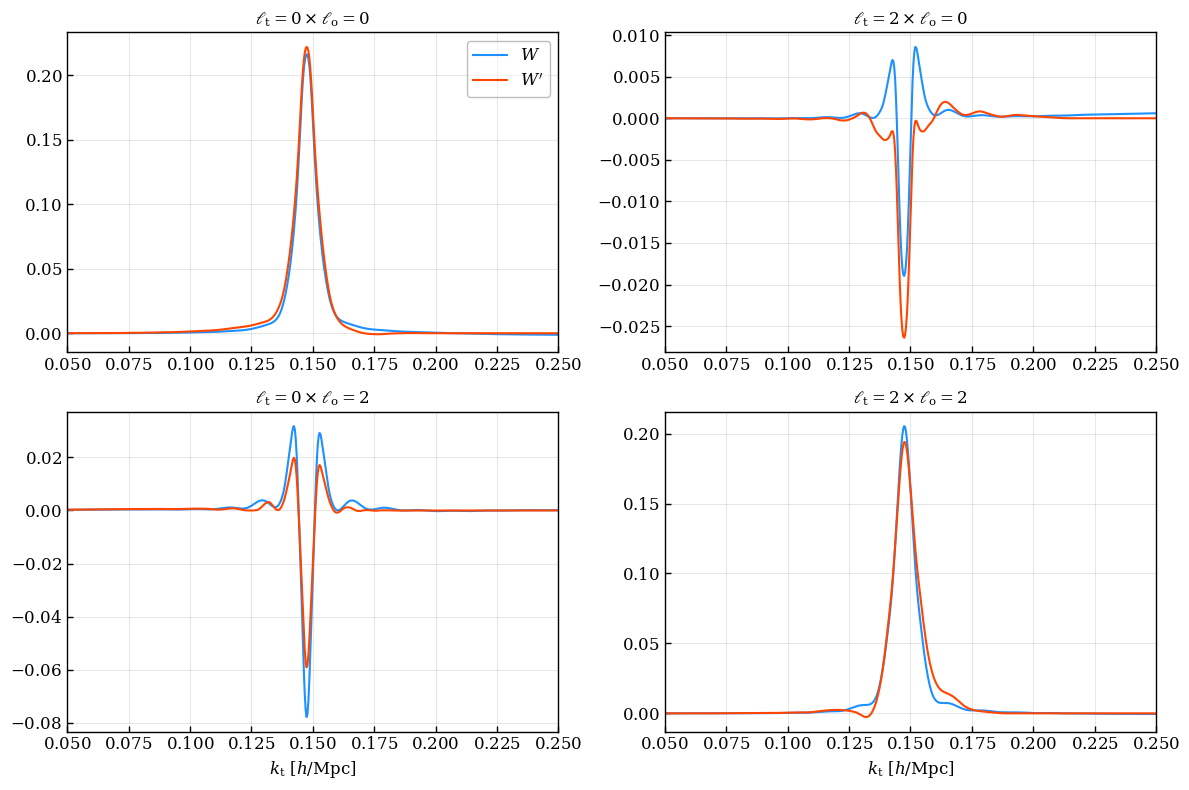

In [17]:
indexout = np.abs(wm.xout[0] - 0.15).argmin()

fig, lax = plt.subplots(len(ls), len(ls), figsize=(12, 8))
for iin, projin in enumerate(ls):
    for iout, projout in enumerate(ls):
        ax = lax[iout][iin]
        # Indices in approximative window matrix
        norm = np.max(np.abs(wm.unpacked()[iin][iout][:, indexout]/wm.xin[iin]))
        ax.plot(wm.xin[iin], wm.unpacked()[iin][iout][:, indexout]/wm.xin[iin], label=r'$W$', color='C0')
        norm = np.max(np.abs(wmnew.unpacked()[iin][iout][:, indexout]/wmnew.xin[iin]))
        ax.plot(wmnew.xin[iin], wmnew.unpacked()[iin][iout][:, indexout]/wmnew.xin[iin], label=r'$W^{\prime}$', color='C1')
        ax.set_title(r'$\ell_{{\mathrm{{t}}}} = {:d} \times \ell_{{\mathrm{{o}}}} = {:d}$'.format(projin, projout))
        ax.set_xlim((0.05, 0.25))
        if iout == len(ls) - 1: ax.set_xlabel(r'$k_{\mathrm{t}}$ [$h/\mathrm{Mpc}$]')
        if iin == iout == 0: lax[iout][iin].legend()

plt.savefig(os.path.join(plots_dir, 'comparison_transformedWindow_y1test_ezmockscov_{}_complete_{}_ells{}.png'.format(tracer, region, ''.join([str(i) for i in ls]))), dpi=300)
plt.show()

In [18]:
ls = (0, 2, 4)

data = get_data('y1', tracer, region, rp_cut=rpcut, zrange=zrange, version='test', kolim=kolim, korebin=korebin, ktmax=0.5, ktrebin=ktrebin, nran=5, cellsize=6, boxsize=7000, covtype='analytic')
wm = data['wmatrix']

data_dir = os.path.join("/global/cfs/cdirs/desi/users/mpinon/sculpt_window/", 'y1/test')
resinfo = '_nran{:d}_cellsize{:d}_boxsize{:d}'.format(5, 6, 7000)
window_fn = os.path.join(data_dir, 'wmatrix_smooth_{}_complete_gtlimaging_{}_{:.1f}_{:.1f}_default_lin{}_rpcut2.5_directedges_ells{}_ezmockscov.npy'.format(tracer, region, zrange[0], zrange[1], resinfo, ''.join([str(i) for i in ls])))
wmnew = PowerSpectrumSmoothWindowMatrix.load(window_fn)

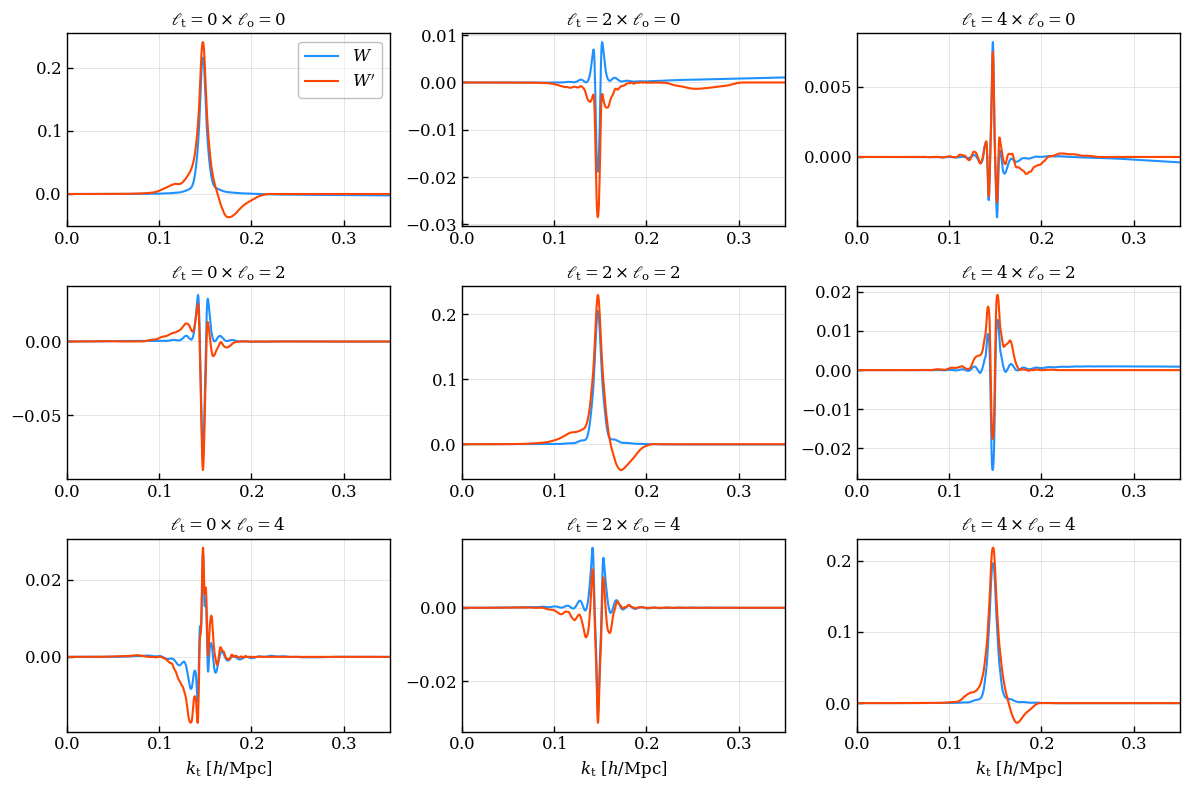

In [21]:
indexout = np.abs(wm.xout[0] - 0.15).argmin()

fig, lax = plt.subplots(len(ls), len(ls), figsize=(12, 8))
for iin, projin in enumerate(ls):
    for iout, projout in enumerate(ls):
        ax = lax[iout][iin]
        # Indices in approximative window matrix
        norm = np.max(np.abs(wm.unpacked()[iin][iout][:, indexout]/wm.xin[iin]))
        ax.plot(wm.xin[iin], wm.unpacked()[iin][iout][:, indexout]/wm.xin[iin], label=r'$W$', color='C0')
        norm = np.max(np.abs(wmnew.unpacked()[iin][iout][:, indexout]/wmnew.xin[iin]))
        ax.plot(wmnew.xin[iin], wmnew.unpacked()[iin][iout][:, indexout]/wmnew.xin[iin], label=r'$W^{\prime}$', color='C1')
        ax.set_title(r'$\ell_{{\mathrm{{t}}}} = {:d} \times \ell_{{\mathrm{{o}}}} = {:d}$'.format(projin, projout))
        ax.set_xlim((0.0, 0.35))
        if iout == len(ls) - 1: ax.set_xlabel(r'$k_{\mathrm{t}}$ [$h/\mathrm{Mpc}$]')
        if iin == iout == 0: lax[iout][iin].legend()

plt.savefig(os.path.join(plots_dir, 'comparison_transformedWindow_cellsize6_y1test_ezmockscov_{}_complete_{}_ells{}.png'.format(tracer, region, ''.join([str(i) for i in ls]))), dpi=300)
plt.show()